# **INTRODUCTION**

In this analysis , i am tasked with providing insights into a Malware Classification dataset. The objective is to apply data visualization techniques to identify patterns and generate actionable insights that can help in business decisions or improve malware detection systems

The goal of this project is to analyze a dataset of malware samples. the dataset used for this project "Classification of Malwares" was obtained from kaggle, and i found it fitting because it contatins various features taken from protable executable file headers. My main objective is to uncover key patterns and relationships with the data obtained , which will surely aid in the identification and classification of malware.

In [15]:
import pandas as pd

# Load the integrated and raw datasets
clamp_integrated_data = pd.read_csv('ClaMP_Integrated-5184.csv')
clamp_raw_data = pd.read_csv('ClaMP_Raw-5184.csv')

# Check the first few rows of each dataset to understand their structure
print(clamp_integrated_data.head())
print(clamp_raw_data.head())


   e_cblp  e_cp  e_cparhdr  e_maxalloc  e_sp  e_lfanew  NumberOfSections  \
0     144     3          4       65535   184       256                 4   
1     144     3          4       65535   184       184                 4   
2     144     3          4       65535   184       272                 5   
3     144     3          4       65535   184       184                 1   
4     144     3          4       65535   184       224                 5   

   CreationYear  FH_char0  FH_char1  ...  sus_sections  non_sus_sections  \
0             1         0         1  ...             1                 3   
1             1         0         1  ...             1                 3   
2             1         0         1  ...             1                 4   
3             1         0         1  ...             0                 1   
4             1         0         1  ...             1                 4   

   packer  packer_type    E_text    E_data  filesize    E_file  fileinfo  \
0       0 

In [16]:
# Info about each dataset
print(clamp_integrated_data.info())
print(clamp_raw_data.info())

# Check missing values
print(clamp_integrated_data.isnull().sum())
print(clamp_raw_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   e_cblp                       5210 non-null   int64  
 1   e_cp                         5210 non-null   int64  
 2   e_cparhdr                    5210 non-null   int64  
 3   e_maxalloc                   5210 non-null   int64  
 4   e_sp                         5210 non-null   int64  
 5   e_lfanew                     5210 non-null   int64  
 6   NumberOfSections             5210 non-null   int64  
 7   CreationYear                 5210 non-null   int64  
 8   FH_char0                     5210 non-null   int64  
 9   FH_char1                     5210 non-null   int64  
 10  FH_char2                     5210 non-null   int64  
 11  FH_char3                     5210 non-null   int64  
 12  FH_char4                     5210 non-null   int64  
 13  FH_char5          

# Summary of the findings according to the results **above** :     

1. **ClaMP_Integrated-5184** :
- Rows: **5210**
- Columns: **70**
- Data Types: **int64 , few float64 columns and one object**
- Missing Values: **None**

2. **ClaMP_Raw-5184** :      
- Rows: **5184**
- Columns: **56**
- Data Types: **int64 , few float64 columns and they're missing due to innaffectability**
- Missing Values: **Two Columns** and they will be dropped since they provide no useful information.

# Data Preprocessing

Normalize and scale numerical features like filesize, SizeOfImage


In [17]:
# Handling the missing values , columns e_res and e_res2 will be dropped

clamp_raw_data.drop(columns=['e_res', 'e_res2'], inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler

# for integrated

scaler= StandardScaler()
numerical_features = ['filesize', 'E_text', 'E_data']
clamp_integrated_data[numerical_features] = scaler.fit_transform(clamp_integrated_data[numerical_features])

# for raw

numerical_features_raw = ['SizeOfImage', 'SizeOfCode', 'SizeOfInitializedData']
clamp_raw_data[numerical_features_raw] = scaler.fit_transform(clamp_raw_data[numerical_features_raw])

# Business and Data Visualization Context

The targeted audience in this analysis includes cybersecurity analysts and IT managers at copanies. the target is to help them understand the characteristics of ,alware and improve their IDS (Intrusion Detection System).

By visualizing trends, correlations and anomalies in the dataset above we can better identify key features that differentiate malicious files from benign ones. The datasets includes structured data with features such as 'filesize' , 'NumberOfSections', and 'Class'.

# Data Exploration and Quality Issues

The integrated dataset contains no missing values however the raw dataset had two columns (e_res and e_res2) with entirely missing values which were dropped.
key features such as filesize and number of sections were analyzed for their distributions and potential outliers. for example the 'filesize' features showed a right-skewed distrinution which shows that most files are small but some are significantly larger.

#Feature Engineering

In [19]:
# One-hot eencode

clamp_integrated_data = pd.get_dummies(clamp_integrated_data, columns=['packer_type'] , drop_first= True)



Comparing the distributions of features for class = 0 (benign) and class = 1 (malicious)


# **Exploratory Data Analysis**


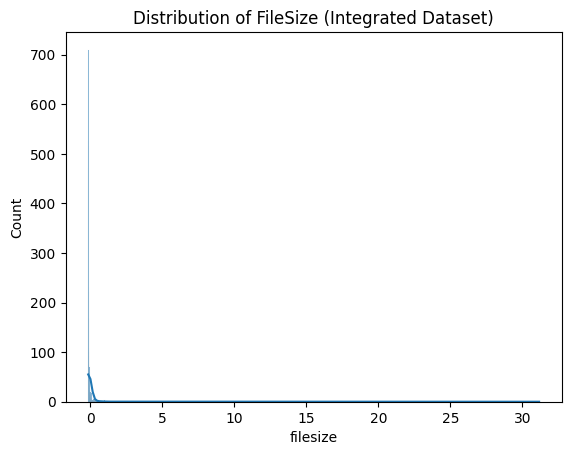

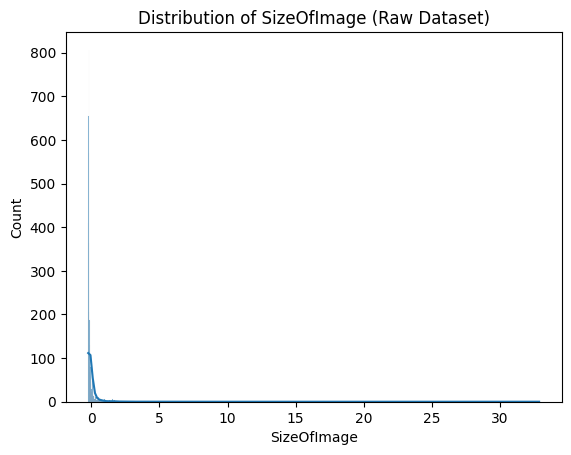

In [20]:
# Import library

import seaborn as sns
import matplotlib.pyplot as plt

# For integrated
sns.histplot(clamp_integrated_data['filesize'], kde=True)
plt.title('Distribution of FileSize (Integrated Dataset)')
plt.show()

# For raw
sns.histplot(clamp_raw_data['SizeOfImage'], kde=True)
plt.title('Distribution of SizeOfImage (Raw Dataset)')
plt.show()

**Insights :**

- The distribution of filesize and sizeofimage is **right-skewed** which means most files are small in size but some a significantly larger.
- This proves that malware files have different size characteristics compared to safe-benign ones.
- will be proven further in # Relationship between file size and number of sections visualization.

**Relevance and Recommendations :**

- File size can be a useful feature for malware detecion as they appear to be larger than benign files.
- Use file size as a feature in malware detection models.

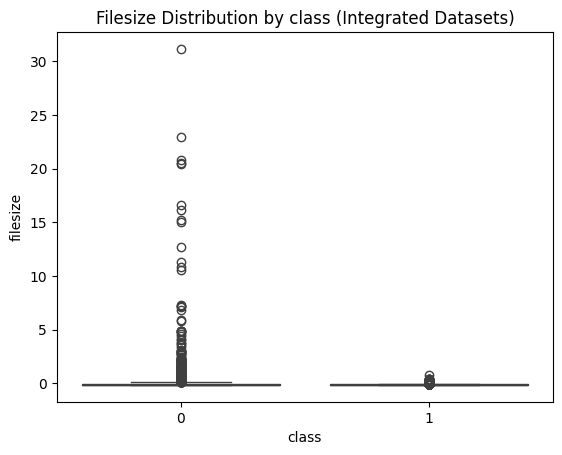

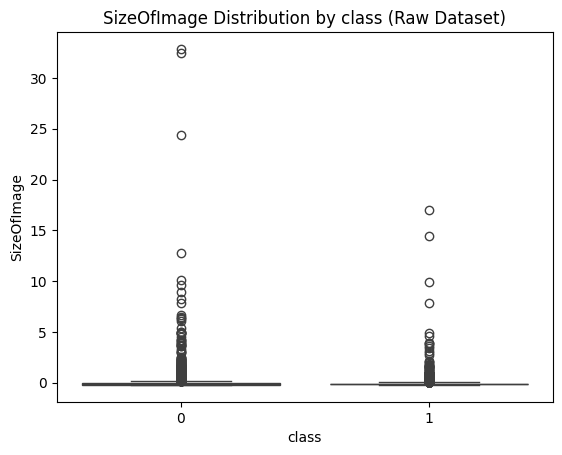

In [21]:
# for intrgrated

sns.boxplot(x='class', y='filesize' , data=clamp_integrated_data)
plt.title('Filesize Distribution by class (Integrated Datasets)')
plt.show()

# for raw

sns.boxplot(x='class', y='SizeOfImage' , data=clamp_raw_data)
plt.title('SizeOfImage Distribution by class (Raw Dataset)')
plt.show()

**Insights :**

- The boxplot above shows that malicious files tend to have a wider range of file sizes compared to benign files.
- e.g some malicious files are a significantly larger or even smaller than average benign files.

**Relevance and Recommendations :**

- The client can use this insight to prioritize the analysis of files with unusual sizes.
- Investigate files with abnormal sizes as potential malware.

<ipython-input-22-fc6c6550633d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=clamp_integrated_data, palette='viridis')


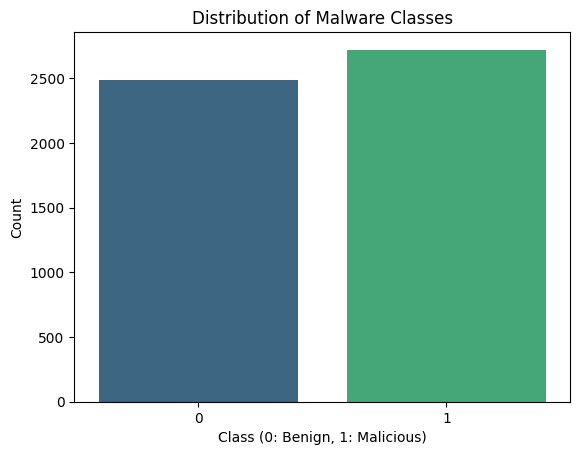

In [22]:
sns.countplot(x='class', data=clamp_integrated_data, palette='viridis')
plt.title('Distribution of Malware Classes')
plt.xlabel('Class (0: Benign, 1: Malicious)')
plt.ylabel('Count')
plt.show()

**Insights :**

- The dataset is balanced with approximately equal numbers on benign (0) and malicious (1) files in integrated and raw datastes
- This balance is beneficial for training machine learning models as it ensures theat the model learns equally.

**Relevance and Recommendations :**

- A balanced dataset reduces the risk of bias in the model which leads to more accurate malware detection.
- Use this dataset to train MLM for malware detection as the balance we have ensures fair learning.

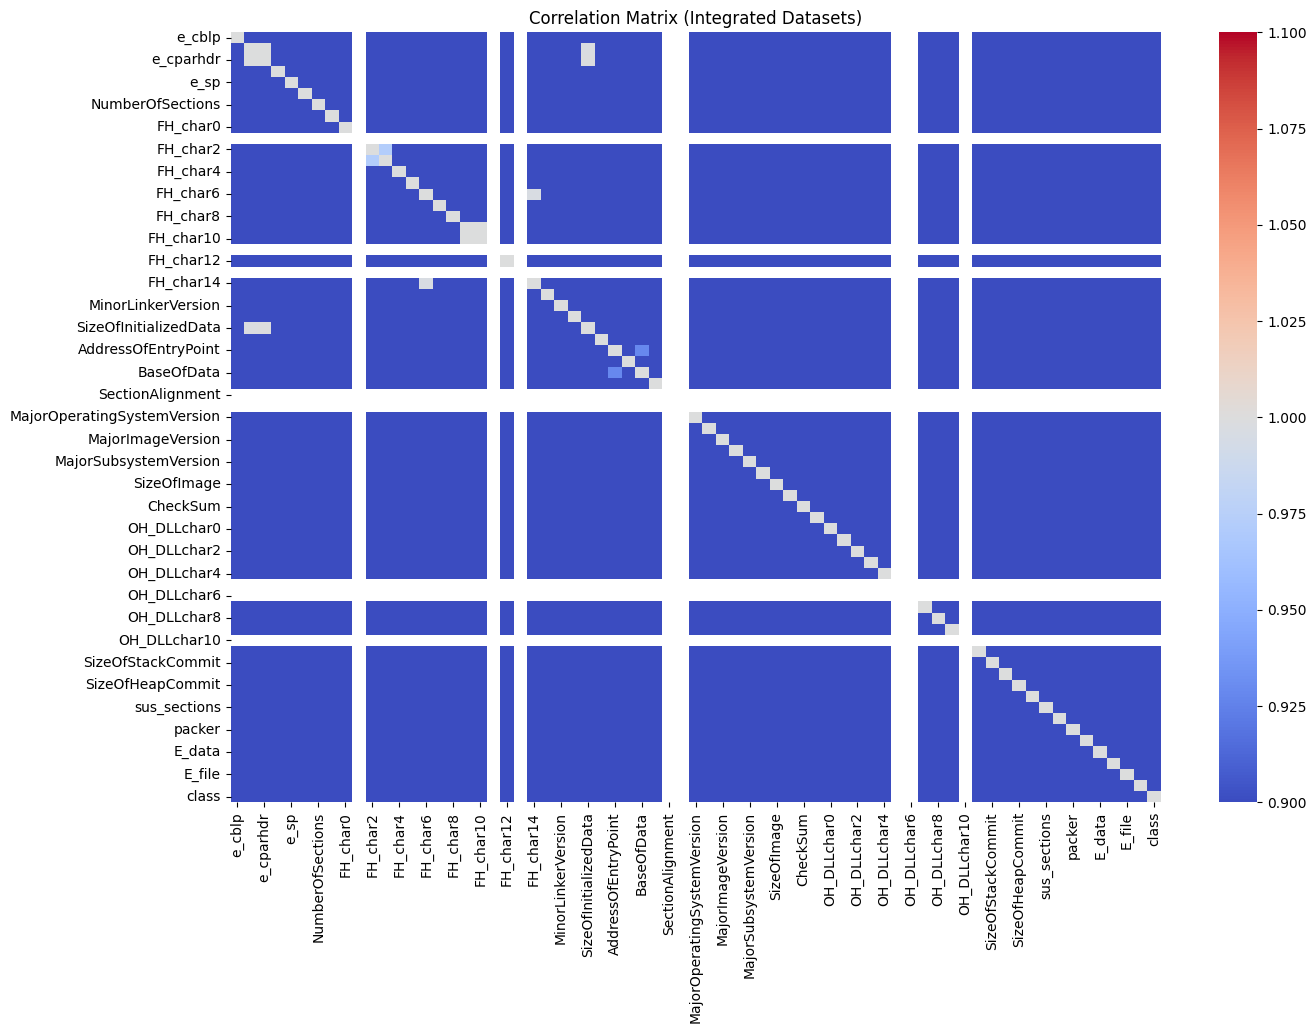

In [23]:
#  Correlation Matrix
## This vizualization shows the correlation between numerical features in the integrated dataset.

plt.figure(figsize=(15, 10))
numerical_data = clamp_integrated_data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=False, cmap='coolwarm', vmin=1 , vmax=1)
plt.title('Correlation Matrix (Integrated Datasets)')
plt.show()

**Insights :**

- The correlation matrix shows the relationships between numerical features.
- Strong positive or negative correlations close to 1 or -1 shows that some features are highly related.
- filesize and numberofsection could be positively correlated , this means that larger files have more sections.

**Recommendations :**

- Investigate deeply correlated features further to figure out if they provide unique information or can be combined.

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1',
       ...
       'packer_type_UPXProtectorv10x2',
       'packer_type_UPXV200V290MarkusOberhumerLaszloMolnarJohnReiser',
       'packer_type_UPXv20MarkusLaszloReiser',
       'packer_type_Upackv039finalDwing', 'packer_type_VideoLanClient',
       'packer_type_WinZip32bitSFXv8xmodule', 'packer_type_WiseInstallerStub',
       'packer_type_XtremeProtectorv105', 'packer_type_nSpackV2xLiuXingPing',
       'packer_type_tElock09910privatetE'],
      dtype='object', length=108)


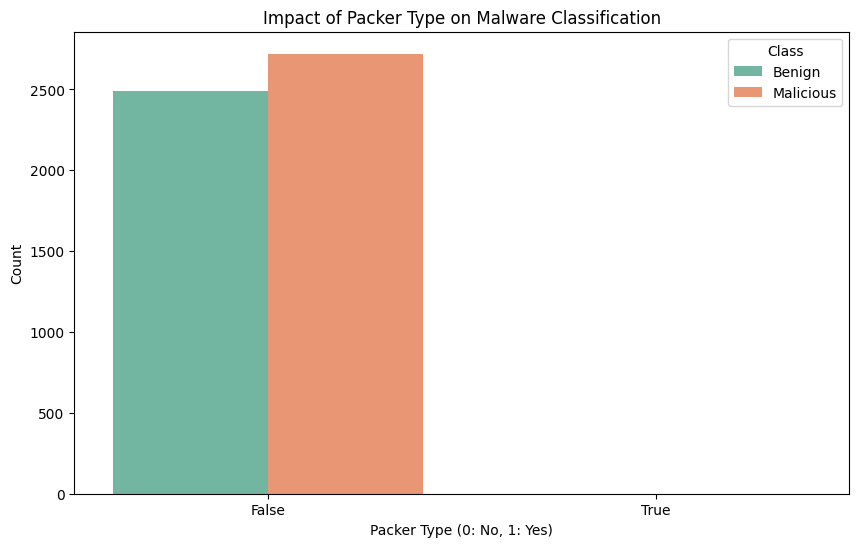

In [24]:
# Impact of Packer Type on Malware Classification
## This visualization shows the distribution of packer_type for benign vs malicious files


plt.figure(figsize=(10, 6))
# Check the new names created by one-hot encoding :
print(clamp_integrated_data.columns)
packer_type_col = clamp_integrated_data.columns[clamp_integrated_data.columns.str.startswith('packer_type_')][0]
sns.countplot(x=packer_type_col, hue='class', data=clamp_integrated_data, palette='Set2')
plt.title('Impact of Packer Type on Malware Classification')
plt.xlabel('Packer Type (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Benign', 'Malicious'])
plt.show()

**Insights :**

- Files that use a packer (packer_type_Yes=1) are more likely to be malicious
- Packers are most-likely used to hide or "Obfuscate" malware , this can be a really strong indicator.

**Relevance and Recommendations :**

- The presence of a packer can be a key feature for malware detection
- The client should priotitize the analysis of packed files (we alse mentioned the prioritzing of analyzing odd-sized files)
- Use packer_type as a feature in malware detection systems.
- Investigate packed files more carefully , perhaps in a more secured sandbox.

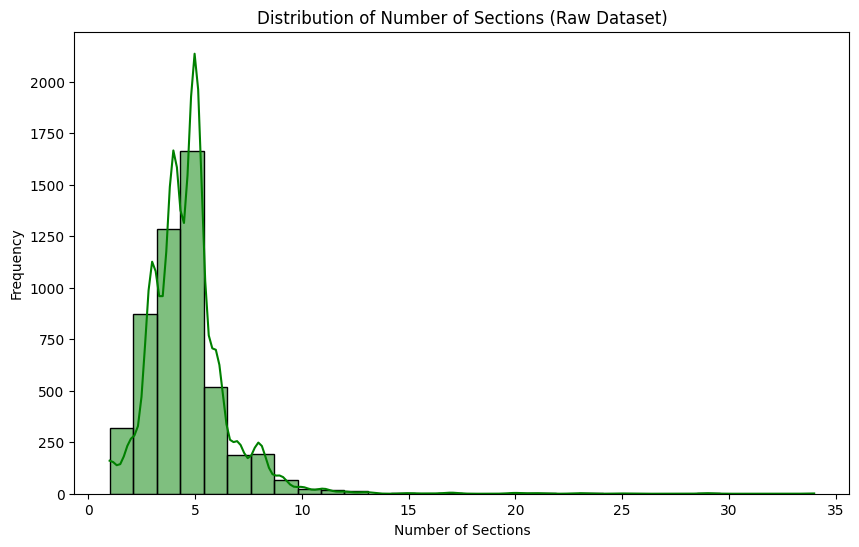

In [25]:
# Distribution of Number of Sections
## This Visualization shows the distribution of NumberOfSections in the raw dataset
plt.figure(figsize=(10, 6))
sns.histplot(clamp_raw_data['NumberOfSections'], kde=True, color='green', bins=30)
plt.title('Distribution of Number of Sections (Raw Dataset)')
plt.xlabel('Number of Sections')
plt.ylabel('Frequency')
plt.show()

**Insights :**

- The distribution of number of sections shows that most files have a small number of sections.
- Malware files might have a different number of sections when compared to benign files.

**Relevance and Recommendations :**

- The number of sections in a file can be a useful feature for malware detection , malicious do not only come in odd sizes , but with odd number of sections too.

- Use numberOfSections as a feature in malware detection models.

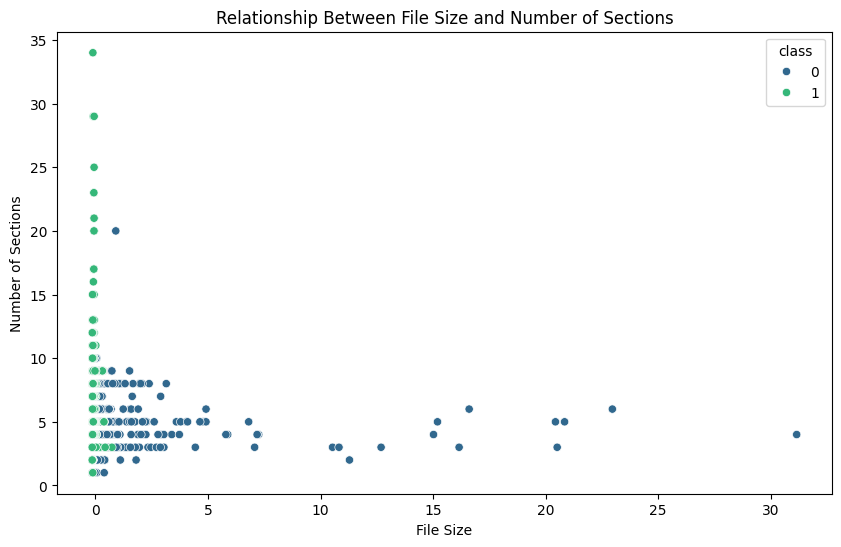

In [26]:
# Relationship between file size and number of sections
## This visualization shows the relationship between filesize and NumberOfSections for malicious vs. benign files.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='filesize', y='NumberOfSections', hue='class', data=clamp_integrated_data, palette='viridis')
plt.title('Relationship Between File Size and Number of Sections')
plt.xlabel('File Size')
plt.ylabel('Number of Sections')
plt.show()

**Insights :**

- The plot above makes us realize that larger files are more likely to be malicious , as the malware does take space on each file its installed on.

**Relevance and Recommendations :**

- The combination of filesized and NumberOfSections can be a strong feature for malware detection.

- Use filesize and NumberOfSections as a main feaute in malware detection.


#Final Discussion and Conclusion

The goal of this analysis was to provide actionable insights into the Classification of Malware Analysis dataset by applying data visualization techniques , one of the goals was also to identify patterns and relationships that could aid and improve malware detection systems. Here's a summary of the findings, limitations and recommendations:


**Key Findings :**

**1 - Balanced Dataset :**

* The dataset is balanced with approximately equal numbers of bening and malicious files , this balance ensures that MLM trained on this data wouldn't be biased toward a specific class.

**2 - File Size as a Feature  :**

* The distribution of filesize is right-skewed as i have mentioned in the insights section of the visualization "distribution of filesize" ; with with most files being small but some significantly larger. Malicious files tend to have a bigger range of sizes , this makes filesize a useful feature for malware detection.

**3 - Packer Type as a Strong Indicator :**

* Files that use a packer (packer_type_Yes = 1) are more likely to be malicious files ; packers are oftenused to obfuscate and hide malware , this is a strong indicator for malware detection.

**4 - Relationship Between File Size & Number of Sections :**

* Larger Files tend to have a bigger number of sections when compared to benign ones , this relationship can be found in malicious files.

**5 - Feature Engineering Insights :**

* New feautres like file_size_category and size_per_section were created to help understand the data , these feautres add more context for malware detection.


** Strengths of the Analysis :**

- **Comprehensive Data Exploration :** The dataset was ddeply explored , and key features were identified for a more comprehensive analysis.

- **Actionable Insights :** The insights generated like filesize , number of sections , and packer type are directly linked to improving malware detection systems.

- **Balanced Dataset:** The dataset's balance ensures that MLM trained on it will be accurate and fair.

**Limitations of the Analysis :**

**1 - Lack of Domain-Specific Features :**

- The dataset does not include some of the crucial behavioral data like network activity or API calls , as they could provide additional information into the malware behavior


**2 - Potential Biases :**

- The data set does not represnt all malware types , as it focuses on the features extractes from PE file headers.



**Recommendations for the client**

**1 - Feautre Selection for Detection Models :**

* Utilize filesize , NumberOfSections , packer_type as main feautres in malware detection models. These features have been shown to be strong indicators of malicious files.

**2 - Investigate Outliers :**

* Analyze files with odd sizes or a high number or sections as they are more likely to be malicious.

**3 - Prioritize Packer Files :**

+ Investigate packed files (packer_type_Yes= 1) during the malware analysis in a more scoped way , as there is a high chance that they might be malicious.

**4 - Incorporate Additional Data Sources :**

* Incorporate additional data such as behavioral data to enhance the detection capabilities , a detection system/software with a wider focus enhances the detection capabilities.

**5 - Train MLM :**


* Train MLM on this datasets as it is balanced , it ensures a more accurate and fair detection.



#Conclusion

The analysis successfully found kex patterns and relationships in the dataset , that can help improve malware detection systems by looking and focusing on given factors like filesize , packer_type and NumberOfSection the client can better spot and identify malware .

The dataset has some limits but the overall results are very useful and provide a solid foundation for further analysis and model development in the future.